<a href="https://colab.research.google.com/github/spegas/Dacon/blob/main/stock_test_240523.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 주식 및 기타 금융 데이터를 가지고 오기 위해서 관련 패키지 설치
# 패키지 사이트 주소 : https://github.com/FinanceData/FinanceDataReader
!pip install finance-datareader

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.6/46.6 kB 1.7 MB/s eta 0:00:00


In [ ]:
import FinanceDataReader as fdr

In [ ]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import time

In [ ]:
# 시가총액 순서대로 데이터를 받아오기
pd_marcap_data = fdr.StockListing('KRX-MARCAP')
print(pd_marcap_data.head(5))
print(pd_marcap_data.columns)

     Code        ISU_CD      Name Market Dept   Close ChangeCode  Changes  \
0  005930  KR7005930003      삼성전자  KOSPI        78300          1      600   
1  000660  KR7000660001    SK하이닉스  KOSPI       200000          1     2300   
2  373220  KR7373220003  LG에너지솔루션  KOSPI       362000          2    -2000   
3  005380  KR7005380001       현대차  KOSPI       271500          2    -5500   
4  207940  KR7207940008  삼성바이오로직스  KOSPI       770000          2    -7000   

   ChagesRatio    Open    High     Low    Volume         Amount  \
0         0.77   77700   79100   77100  18728087  1462378998195   
1         1.16  203500  204000  198200   4681849   942514526000   
2        -0.55  364000  366000  360000    157841    57243528000   
3        -1.99  273500  275000  267500   1886248   511318633500   
4        -0.90  773000  779000  770000     73622    56939614000   

            Marcap      Stocks MarketId  
0  467433973665000  5969782550      STK  
1  145600473000000   728002365      STK  
2   8470

In [ ]:
pd_kospi_marcp = pd_marcap_data[pd_marcap_data['Market']=='KOSPI']
print(pd_kospi_marcp.head(5))

pd_kospi_top50 = pd_kospi_marcp.iloc[0:10, :].copy()
pd_kospi_top50 = pd_kospi_top50.reset_index(drop=True)
print(pd_kospi_top50.head(5))

     Code        ISU_CD      Name Market Dept   Close ChangeCode  Changes  \
0  005930  KR7005930003      삼성전자  KOSPI        78300          1      600   
1  000660  KR7000660001    SK하이닉스  KOSPI       200000          1     2300   
2  373220  KR7373220003  LG에너지솔루션  KOSPI       362000          2    -2000   
3  005380  KR7005380001       현대차  KOSPI       271500          2    -5500   
4  207940  KR7207940008  삼성바이오로직스  KOSPI       770000          2    -7000   

   ChagesRatio    Open    High     Low    Volume         Amount  \
0         0.77   77700   79100   77100  18728087  1462378998195   
1         1.16  203500  204000  198200   4681849   942514526000   
2        -0.55  364000  366000  360000    157841    57243528000   
3        -1.99  273500  275000  267500   1886248   511318633500   
4        -0.90  773000  779000  770000     73622    56939614000   

            Marcap      Stocks MarketId  
0  467433973665000  5969782550      STK  
1  145600473000000   728002365      STK  
2   8470

In [ ]:
pd_kosdaq_marcp = pd_marcap_data[pd_marcap_data['Market']=='KOSDAQ']
print(pd_kosdaq_marcp.head(5))

pd_kosdaq_top50 = pd_kosdaq_marcp.iloc[0:10, :].copy()
pd_kosdaq_top50 = pd_kosdaq_top50.reset_index(drop=True)
print(pd_kosdaq_top50.head(5))

       Code        ISU_CD    Name  Market   Dept   Close ChangeCode  Changes  \
26   086520  KR7086520004    에코프로  KOSDAQ  우량기업부   96800          2     -400   
61   028300  KR7028300002     HLB  KOSDAQ  중견기업부   48700          2     -600   
62   348370  KR7348370008      엔켐  KOSDAQ  벤처기업부  323000          2    -4000   
103  068760  KR7068760008  셀트리온제약  KOSDAQ  우량기업부   92800          3        0   
110  403870  KR7403870009    HPSP  KOSDAQ  중견기업부   41750          1      150   

     ChagesRatio    Open    High     Low    Volume        Amount  \
26         -0.41   96200   97500   95400    673359   64975978700   
61         -1.22   49500   57400   48700  14556424  760523066950   
62         -1.22  327500  331000  318000    231786   75516686000   
103         0.00   92900   93700   92500     70062    6505685300   
110         0.36   42200   42250   41450   1373738   57502034800   

             Marcap     Stocks MarketId  
26   12887791312000  133138340      KSQ  
61    6372169226800  13084

In [ ]:
# 2. 종목별 데이터 다운로드 및 가격 변동폭 계산
def get_price_change(stock_code):

  end_date = datetime.now()
  start_date = end_date - timedelta(days=30)

  print(" -- stock_code -- ")
  print(stock_code)

  # print(" -- stock_code, start_date, end_date -- ")
  # print(stock_code, start_date, end_date)

  fetch_df = fdr.DataReader(stock_code, start_date, end_date)

  print(" -- fetch_df -- ")
  print(fetch_df.head(5))

  time.sleep(1)

  if not fetch_df.empty:
      max_price = fetch_df['Close'].max()
      min_price = fetch_df['Close'].min()
      price_change = max_price - min_price
      change_percent = (price_change/fetch_df['Close'].mean()) * 100

      return min_price, max_price, price_change, change_percent
  return 0, 0, 0, 0

In [ ]:
# 3. 상위 30개 종목의 변동폭 계산

pd_kospi_top50.loc[:, 'MinPrice'] = 0
pd_kospi_top50.loc[:, 'MaxPrice'] = 0
pd_kospi_top50.loc[:, 'PriceChange'] = 0
pd_kospi_top50.loc[:, 'ChangePercent'] = 0


pd_kospi_top50[['MinPrice', 'MaxPrice', 'PriceChange', 'ChangePercent']] = pd_kospi_top50['Code'].apply(lambda x: pd.Series(get_price_change(x)))

print(" -- pd_kospi_top50 -- ")
print(pd_kospi_top50.head(5))

# 4. 가격 변동폭이 큰 순서대로 정리
pd_kospi_sorted = pd_kospi_top50.sort_values(by='ChangePercent', ascending=False).reset_index(drop=True)

# 결과 출력
print("KOSDAQ 상위 50개 종목 변동폭 순서")
print(pd_kospi_sorted[['Name', 'Code', 'ChangePercent', 'PriceChange', 'MinPrice', 'MaxPrice']])


 -- stock_code -- 
005930
 -- fetch_df -- 
             Open   High    Low  Close    Volume    Change
Date                                                      
2024-04-24  77500  78800  77200  78600  22166150  0.041060
2024-04-25  77300  77500  76300  76300  15549134 -0.029262
2024-04-26  77800  77900  76500  76700  12755629  0.005242
2024-04-29  77400  77600  76200  76700  14664474  0.000000
2024-04-30  77000  78500  76600  77500  19007007  0.010430
 -- stock_code -- 
000660
 -- fetch_df -- 
              Open    High     Low   Close   Volume    Change
Date                                                         
2024-04-24  178900  180200  176300  179800  4254632  0.051462
2024-04-25  173800  176700  170600  170600  5332149 -0.051168
2024-04-26  176200  178300  174900  177800  5471765  0.042204
2024-04-29  179100  180400  175600  175900  2892809 -0.010686
2024-04-30  175900  179000  173800  174200  3655060 -0.009665
 -- stock_code -- 
373220
 -- fetch_df -- 
              Open    Hi

In [ ]:
# 3. 상위 30개 종목의 변동폭 계산

pd_kosdaq_top50.loc[:, 'MinPrice'] = 0
pd_kosdaq_top50.loc[:, 'MaxPrice'] = 0
pd_kosdaq_top50.loc[:, 'PriceChange'] = 0
pd_kosdaq_top50.loc[:, 'ChangePercent'] = 0


pd_kosdaq_top50[['MinPrice', 'MaxPrice', 'PriceChange', 'ChangePercent']] = pd_kosdaq_top50['Code'].apply(lambda x: pd.Series(get_price_change(x)))

print(" -- pd_kosdaq_top50 -- ")
print(pd_kosdaq_top50.head(5))

# 4. 가격 변동폭이 큰 순서대로 정리
pd_kosdaq_sorted = pd_kosdaq_top50.sort_values(by='ChangePercent', ascending=False).reset_index(drop=True)

# 결과 출력
print("KOSDAQ 상위 50개 종목 변동폭 순서")
print(pd_kosdaq_sorted[['Name', 'Code', 'ChangePercent', 'PriceChange', 'MinPrice', 'MaxPrice']])

 -- stock_code -- 
086520
 -- fetch_df -- 
              Open    High     Low   Close   Volume    Change
Date                                                         
2024-04-24       0       0       0  103400        0  0.000000
2024-04-25  114300  115400  105800  108100  6043419  0.045455
2024-04-26  108400  109200  104500  106000  1945509 -0.019426
2024-04-29  105000  106700  103100  106000  1739206  0.000000
2024-04-30  108500  110400  106100  106200  2139470  0.001887
 -- stock_code -- 
028300
 -- fetch_df -- 
              Open    High     Low   Close   Volume    Change
Date                                                         
2024-04-24  107600  109500  105400  108500  1229934  0.016870
2024-04-25  107300  112600  107000  109600  1700986  0.010138
2024-04-26  109600  111700  100100  110100  2387462  0.004562
2024-04-29  110100  110500  106300  109400  1177733 -0.006358
2024-04-30  107100  114300  107000  111200  2081958  0.016453
 -- stock_code -- 
348370
 -- fetch_df -- 
   

In [ ]:
pip install numpy pandas matplotlib scikit-learn tensorflow yfinance

In [ ]:
import matplotlib.pyplot as plt
from datetime import datetime
import pandas as pd
import numpy as np
import yfinance as yf
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [ ]:
# 주식 데이터 가져오기
ticker = '005930.KS'  # 삼성전자 종목코드 예시

In [ ]:
end_date = datetime.today()
str_end_date = end_date.strftime('%Y-%m-%d')
print(" -- str_end_date -- ")
print(str_end_date)

start_date = end_date - timedelta(days=180)

str_start_date = start_date.strftime('%Y-%m-%d')
print(" -- str_start_date -- ")
print(str_start_date)

 -- str_end_date -- 
2024-05-23
 -- str_start_date -- 
2023-11-25


In [ ]:
from copy import deepcopy
fetch_stock_data = yf.download(ticker, start=str_start_date, end=str_end_date)
print(fetch_stock_data.columns)
print(fetch_stock_data.head(5))
# stock_data = fetch_stock_data[['Close', 'Volume']]

stock_data = fetch_stock_data.copy(deepcopy=True).drop(columns=['Adj Close'])

[*********************100%%**********************]  1 of 1 completed

Index(['Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')
               Open     High      Low    Close     Adj Close    Volume
Date                                                                  
2023-11-27  71500.0  72100.0  71100.0  71300.0  70963.976562   9113857
2023-11-28  71400.0  72700.0  71300.0  72700.0  72357.375000  13283081
2023-11-29  72400.0  72800.0  72200.0  72700.0  72357.375000   9283933
2023-11-30  72700.0  72800.0  72200.0  72800.0  72456.906250  15783714
2023-12-01  72400.0  72500.0  71700.0  72000.0  71660.679688   9871284


In [ ]:
# 추가 데이터 (유사 종목 및 회사 회계정보)
# 유사 종목 데이터 예시
similar_ticker = '000660.KS'  # SK하이닉스 종목코드 예시

In [ ]:
fetch_similar_data = yf.download(similar_ticker, start=str_start_date, end=str_end_date)
# stock_data['Similar_Close'] = fetch_similar_data['Close']

similar_stock_data = fetch_similar_data.copy(deepcopy=True).drop(columns=['Adj Close'])

In [ ]:
total_stock_data = pd.concat([stock_data, similar_stock_data], axis=1)

In [ ]:
# 회사 회계 정보 예시 (여기서는 임의의 데이터 사용)
# 실제로는 회사의 분기별 또는 연간 재무제표 데이터를 사용
financial_data = {
    'Date': stock_data.index,
    'Revenue': np.random.uniform(100, 500, len(stock_data)),
    'Operating_Income': np.random.uniform(10, 50, len(stock_data))
}

In [ ]:
financial_df = pd.DataFrame(financial_data)
financial_df.set_index('Date', inplace=True)

# 주식 데이터와 재무 데이터 병합
ml_input_data = pd.concat([total_stock_data, financial_df], axis=1)

In [ ]:
# 데이터 정규화
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(ml_input_data)

In [ ]:
# 학습 데이터와 테스트 데이터 분리
train_size = int(len(scaled_data) * 0.8)
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

In [ ]:
# 데이터셋 생성 함수
def create_dataset(data, time_step=1):
    X, Y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step)])
        Y.append(data[i + time_step, 0])
    return np.array(X), np.array(Y)

In [ ]:
time_step = 60
X_train, Y_train = create_dataset(train_data, time_step)
X_test, Y_test = create_dataset(test_data, time_step)

# LSTM 모델 입력 형식에 맞게 데이터 변형
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], X_train.shape[2])
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], X_test.shape[2])

# LSTM 모델 정의 및 학습
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, X_train.shape[2])))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, Y_train, batch_size=1, epochs=1)

531/531 [==============================] - 17s 26ms/step - loss: 0.0076


In [ ]:
# 테스트 데이터 예측
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# 예측값 역정규화
train_predict = scaler.inverse_transform(np.concatenate((train_predict, np.zeros((train_predict.shape[0], scaled_data.shape[1] - 1))), axis=1))[:,0]
test_predict = scaler.inverse_transform(np.concatenate((test_predict, np.zeros((test_predict.shape[0], scaled_data.shape[1] - 1))), axis=1))[:,0]

3/3 [==============================] - 0s 13ms/step


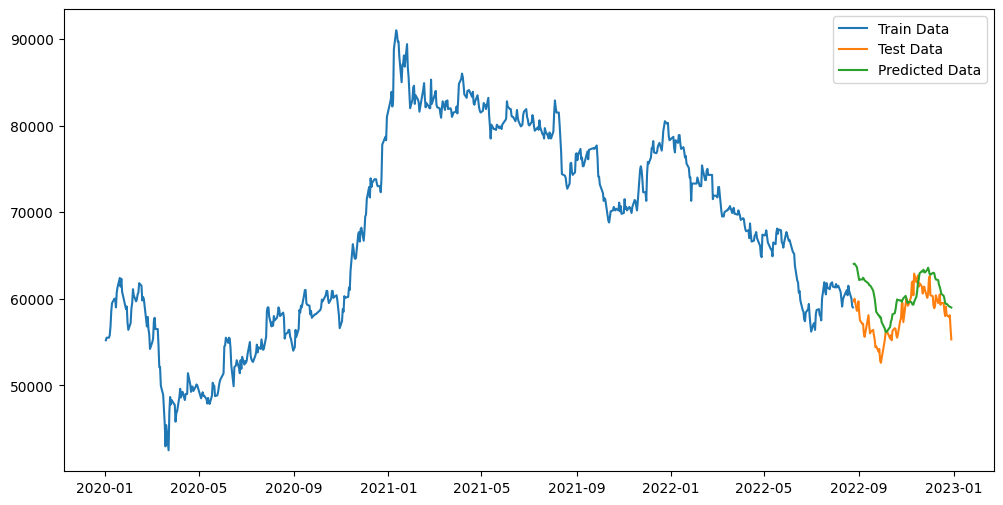

In [ ]:
# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[:train_size + time_step + 1], scaler.inverse_transform(scaled_data[:train_size + time_step + 1])[:,0], label='Train Data')
plt.plot(data.index[train_size + time_step + 1:], scaler.inverse_transform(scaled_data[train_size + time_step + 1:])[:,0], label='Test Data')
plt.plot(data.index[train_size + time_step + 1:], test_predict, label='Predicted Data')
plt.legend()
plt.show()

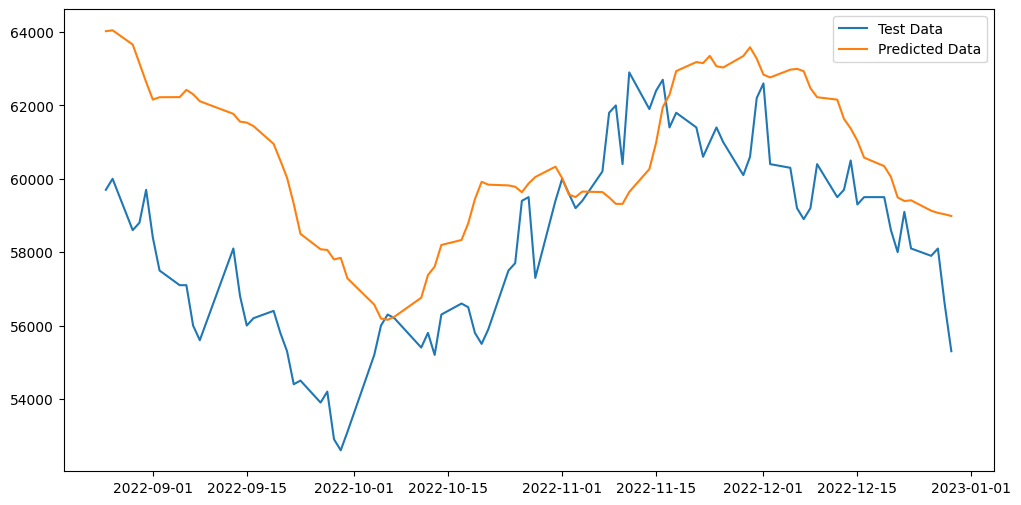

In [ ]:
# 실제값과 예측값 시각화
plt.figure(figsize=(12, 6))
plt.plot(data.index[train_size + time_step + 1:], scaler.inverse_transform(scaled_data[train_size + time_step + 1:])[:,0], label='Test Data')
plt.plot(data.index[train_size + time_step + 1:], test_predict, label='Predicted Data')
plt.legend()
plt.show()